In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

folder_path = r'C:\Users\sungj\Downloads\Datasets\9) Car-Hacking Dataset\{0}_dataset.csv'
column_names = ['Timestamp', 'CAN ID', 'DLC', 'DATA0', 'DATA1', 'DATA2',
                'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']
attacks = {}
for attack in ['DoS', 'Fuzzy', 'gear', 'RPM']:
    data = pd.read_csv(folder_path.format(attack), names=column_names)
    attacks[attack] = data
    
combined_dataset = pd.concat(attacks.values()).values

data = pd.DataFrame(combined_dataset, columns=column_names)
display(data.head(10))
print(data.describe)
# nan_values = data.loc[data['DLC'] != 8]
# print(nan_values.shape[0])

,Timestamp,CAN ID,DLC,DATA0,DATA1,DATA2,DATA3,DATA4,DATA5,DATA6,DATA7,Flag
0,1478198376.389427,0316,8,05,21,68,09,21,21,00,6f,R
1,1478198376.389636,018f,8,fe,5b,00,00,00,3c,00,00,R
2,1478198376.389864,0260,8,19,21,22,30,08,8e,6d,3a,R
3,1478198376.390096,02a0,8,64,00,9a,1d,97,02,bd,00,R
4,1478198376.390333,0329,8,40,bb,7f,14,11,20,00,14,R
5,1478198376.390574,0545,8,d8,00,00,8a,00,00,00,00,R
6,1478198376.393317,0002,8,00,00,00,00,00,03,0b,11,R
7,1478198376.393552,0153,8,00,21,10,ff,00,ff,00,00,R
8,1478198376.394175,02c0,8,14,00,00,00,00,00,00,00,R
9,1478198376.394414,0130,8,08,80,00,ff,31,80,0b,7f,R


<bound method NDFrame.describe of                   Timestamp CAN ID DLC DATA0 DATA1 DATA2 DATA3 DATA4 DATA5  \
0         1478198376.389427   0316   8    05    21    68    09    21    21   
1         1478198376.389636   018f   8    fe    5b    00    00    00    3c   
2         1478198376.389864   0260   8    19    21    22    30    08    8e   
3         1478198376.390096   02a0   8    64    00    9a    1d    97    02   
4         1478198376.390333   0329   8    40    bb    7f    14    11    20   
...                     ...    ...  ..   ...   ...   ...   ...   ...   ...   
16569470  1478201209.058007   018f   8    fe    59    00    00    00    41   
16569471  1478201209.058237   0260   8    18    21    21    30    08    8f   
16569472  1478201209.058471   02a0   8    24    00    9a    1d    97    02   
16569473  1478201209.058703   0329   8    dc    b7    7f    14    11    20   
16569474  1478201209.058944   0545   8    d8    00    00    8b    00    00   

         DATA6 DATA7 Flag  
0

Text(0, 0.5, 'Messages')

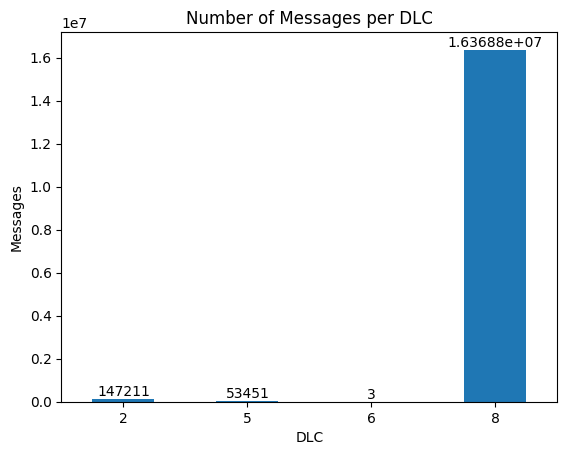

In [2]:
fig = data.groupby('DLC').size().plot.bar()
fig.bar_label(fig.containers[0])
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of Messages per DLC")
plt.xlabel("DLC")
plt.ylabel("Messages")

Text(0, 0.5, 'Messages')

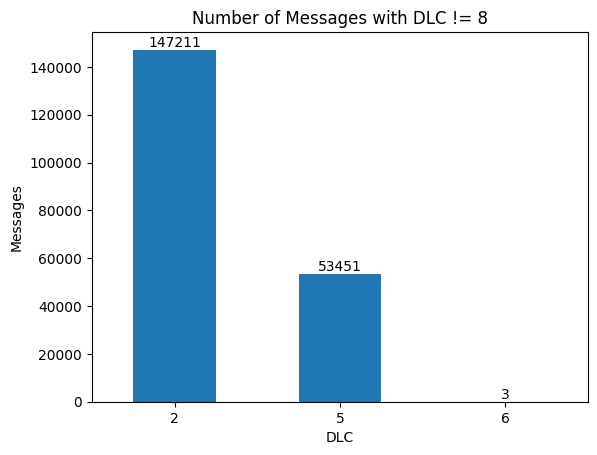

In [25]:
nan_values = data.loc[data['DLC'] != 8]
fig = nan_values.groupby('DLC').size().plot.bar()
fig.bar_label(fig.containers[0])
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of Messages with DLC != 8")
plt.xlabel("DLC")
plt.ylabel("Messages")

Text(0, 0.5, 'Messages')

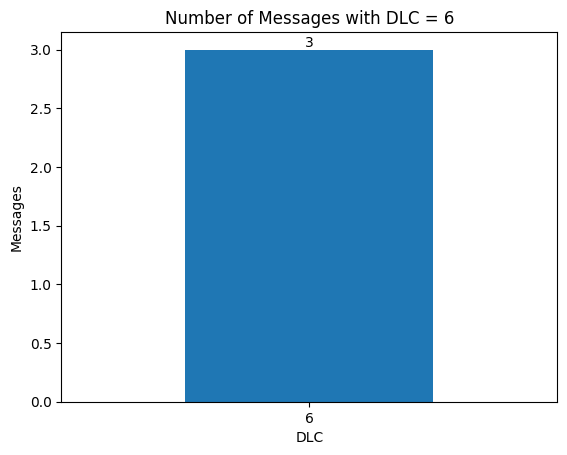

In [24]:
nan_values = data.loc[data['DLC'] == 6]
fig = nan_values.groupby('DLC').size().plot.bar()
fig.bar_label(fig.containers[0])
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Number of Messages with DLC = 6")
plt.xlabel("DLC")
plt.ylabel("Messages")

(array([0]), [Text(0, 0, '0000')])

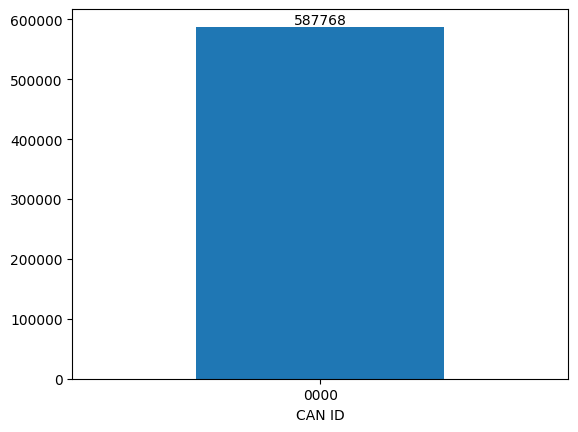

In [23]:
dos = data.loc[data['CAN ID'] == '0000']
fig = dos.groupby('CAN ID').size().plot.bar()
fig.bar_label(fig.containers[0])
plt.xticks(rotation=0, horizontalalignment="center")

Text(0, 0.5, 'Messages')

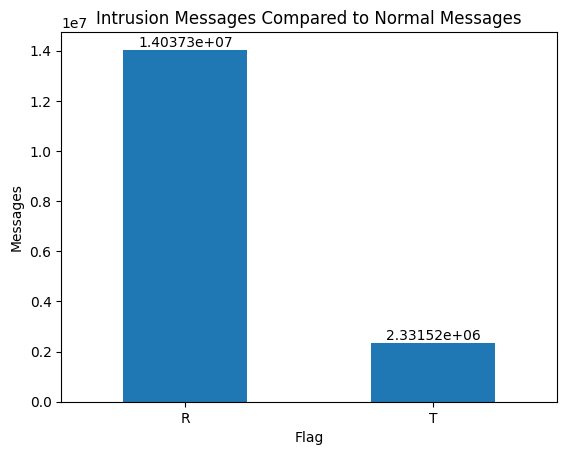

In [57]:
# data.groupby('Flag').size().plot.bar()
fig = data.groupby('Flag').size().plot(kind="bar")
fig.bar_label(fig.containers[0])
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Intrusion Messages Compared to Normal Messages")
plt.xlabel("Flag")
plt.ylabel("Messages")

In [93]:
import os

def convert_bytes(num):
    for x in ['bytes', 'KB', 'MB', 'GB', 'TB']:
        if num < 1024.0:
            return num
        num /= 1024.0


def file_size(file_path):
    if os.path.isfile(file_path):
        file_info = os.stat(file_path)
        return convert_bytes(file_info.st_size)


file_path = r'C:\Users\sungj\Downloads\Datasets\9) Car-Hacking Dataset\{0}_dataset.csv'
size = {}
for attack in ['DoS', 'Fuzzy', 'gear', 'RPM']:
    size[attack+'_dataset'] = file_size(file_path.format(attack))
    print(attack + '_dataset: ' + str(file_size(file_path.format(attack))))

DoS_dataset: 181.25410842895508
Fuzzy_dataset: 189.32415676116943
gear_dataset: 219.6506633758545
RPM_dataset: 228.48313903808594


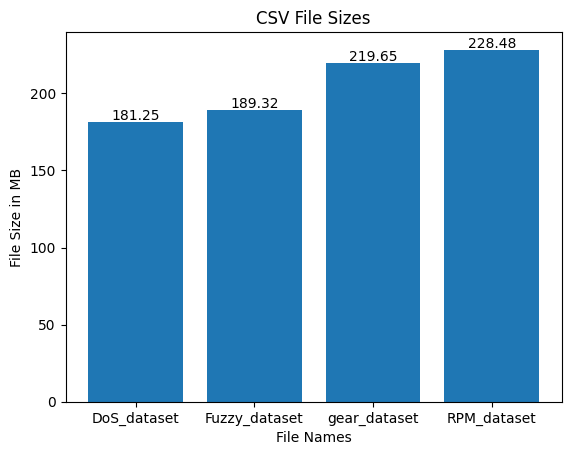

In [94]:
plt.bar(*zip(*size.items()))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("CSV File Sizes")
plt.xlabel("File Names")
plt.ylabel("File Size in MB")

y = [181.25, 189.32, 219.65, 228.48]
for i, v in enumerate(y):
    plt.text(i - 0.2, v + 1.5, str(v))
    
plt.show()

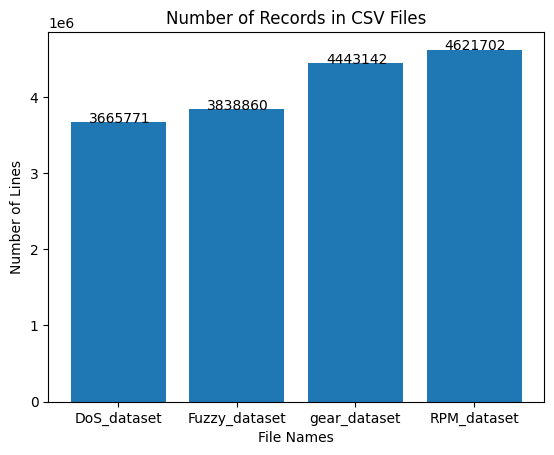

In [102]:
file_paths = [r'C:\Users\sungj\Downloads\Datasets\9) Car-Hacking Dataset\DoS_dataset.csv', 
              r'C:\Users\sungj\Downloads\Datasets\9) Car-Hacking Dataset\Fuzzy_dataset.csv', 
              r'C:\Users\sungj\Downloads\Datasets\9) Car-Hacking Dataset\gear_dataset.csv', 
              r'C:\Users\sungj\Downloads\Datasets\9) Car-Hacking Dataset\RPM_dataset.csv']

num_lines = []
for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        num_lines.append(len(lines))

fig, ax = plt.subplots()
ax.bar(range(len(file_paths)), num_lines)

for i, v in enumerate(num_lines):
    plt.text(i - 0.25, v + 10, str(v))

ax.set_title('Number of Records in CSV Files')
ax.set_xlabel('File Names')
ax.set_ylabel('Number of Lines')

plt.xticks(range(len(file_paths)), ['DoS_dataset', 'Fuzzy_dataset', 'gear_dataset', 'RPM_dataset'])

plt.show()